In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import patsy as ps

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_csv('../data/H1N1_Flu_Vaccines_removed2.csv')
df

,Unnamed: 0,h1n1_vaccine,seasonal_vaccine,age_group,sex,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,income_poverty,employment_status
0,0,0,0,3,1,1,0,0,0,1,0,3,1,2,2,1,2,0,0,2
1,1,0,1,1,0,3,2,1,0,1,0,5,4,4,4,2,4,1,0,1
2,2,0,0,0,0,1,1,1,0,0,1,3,1,1,4,1,2,3,1,1
3,3,0,1,4,1,1,1,1,1,0,1,3,3,5,5,4,1,1,0,2
4,4,0,0,2,1,2,1,1,1,0,0,3,3,2,3,1,4,2,1,1
5,5,0,0,4,0,3,1,1,0,0,0,5,2,1,5,4,4,1,1,1
6,6,0,0,3,0,0,0,0,0,0,0,4,1,1,4,2,1,0,1,1
7,7,1,1,2,1,1,0,1,0,0,1,5,2,1,4,2,1,2,1,1
8,8,0,0,2,0,0,2,1,1,1,0,4,1,1,4,2,1,3,2,1
9,9,0,0,3,0,2,1,1,1,0,1,4,2,2,4,2,2,1,1,2


In [5]:
train_pre= df[['age_group','sex', 'education','income_poverty','employment_status', 
               'chronic_med_condition','h1n1_concern','h1n1_knowledge','behavioral_avoidance','behavioral_large_gatherings','behavioral_outside_home']]

// 학습 목표 : 1. h1n1 백신 접종 여부(0/1)
//               (2. 가능하다면 seasonal= 계절독감 백신 접종 여부(0/1)도)
//        대상 : train_pre 로 선정한 칼럼.
//                (연령대/성별/교육수준/소득수준/고용상태/만성질환여부/(관심)신종플루에대한관심/신종플루에대한지식/(행동)유사증상자와대면자제/대규모집회자제/외출자제)
                

In [6]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

In [7]:
X_train, X_test, y_train, y_test=train_test_split(train_pre,
                 df[['h1n1_vaccine']], 
                 test_size = 0.2, 
                 random_state = 33 
                )

In [7]:
# criterion
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.7829290936520831


In [8]:
#criterion 지니계수가 default. = 예측값 같음.
#tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=13)
#tree_clf.fit(X_train, y_train)

#print('Score: {}'.format(tree_clf.score(X_train, y_train)))

In [9]:
y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  77.67463448595961


# 랜덤포레스트

In [10]:
classifier = RandomForestClassifier(n_estimators=10)

In [11]:
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)
score= classifier.score(X_test, y_test)
print(score)
# n_estimators를 변경했을 때에.
# 얘는 또 왜 ?? 0.7284752842886981
# default : 10 > 0.7314922255743792
# 50 > 0.736829890925969
# 75 > 0.7354374564864238 
# 100 > 0.7391506149918775
# 1000 > 0.7386864701786957

0.7356695288930146


## 랜덤포레스트-  그리드서치

In [12]:
from sklearn.model_selection import GridSearchCV


params = { 'n_estimators' : [10, 50, 75, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

rf_clf1=RandomForestClassifier(n_estimators=100, 
                               max_depth=9, 
                               min_samples_leaf=19, 
                               min_samples_split=6, 
                               random_state=33, 
                               n_jobs= -1)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
accuracy_score(y_test,pred)
# > 0.7837085170573219

#print('예측 정확도 : {:.4f}'.format(accuracy_score(y_test,pred)))

%matplotlib inline
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

h1n1_concern, h1n1_knowledge, chronic_med_condition 등이 높은 피처 중요도로 나왔습니다.

## 로지스틱 회귀. KNN

In [13]:
# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN입니다.
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

In [14]:
# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression), ('KNN', knn)], voting='soft')


In [15]:
# 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test=train_test_split(train_pre,
                 df[['h1n1_vaccine']], 
                 test_size = 0.2, 
                 random_state = 33 
                )

In [16]:
# 보팅 분류기의 학습/예측/평가
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('Score: {}'.format(tree_clf.score(X_train, y_train)))
# Score: 0.7829290936520831

Score: 0.7829290936520831


In [17]:
# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
# LogisticRegression 정확도: 0.7832
# KNeighborsClassifier 정확도: 0.7712

LogisticRegression 정확도: 0.7835
KNeighborsClassifier 정확도: 0.7712


## AdaBoost결정트리

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
clf = AdaBoostClassifier(n_estimators=30, 
                        random_state=10, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))
# AdaBoost 정확도: 0.7835

AdaBoost 정확도: 0.7835


## 그래디언트 부스팅 결정 트리

In [20]:
from sklearn.ensemble import GradientBoostingClassifier 
import time

In [21]:
# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))
# GBM 정확도: 0.7821 / GBM 수행 시간: 1.2초

GBM 정확도: 0.7821
GBM 수행 시간: 1.1초


In [22]:
param = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train.values)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
# Fitting 2 folds for each of 4 candidates, totalling 8 fits
# [Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   11.5s finished
# 최적 하이퍼 파라미터: 
# {'learning_rate': 0.05, 'n_estimators': 100}
# 최고 예측 정확도: 0.7813

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터: 
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도: 0.7813


In [23]:
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
# GBM 정확도: 0.7835

GBM 정확도: 0.7835


## 교차 검증

#### 교차 검증을 10번 수행하여, 10번의 교차 검증 평균 정확도를 저장합니다.

In [24]:
features, labels = train_pre, df['h1n1_vaccine']

In [25]:
def cross_validation(classifier,features, labels):
    cv_scores = []

    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    
    return cv_scores

In [26]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)

In [27]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

In [28]:
cv_list = [    
            ['random_forest',rf_cv_scores],
            ['decision_tree',dt_cv_scores],
          ]
chart = pd.DataFrame.from_items(cv_list)

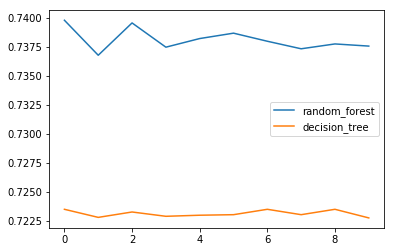

In [29]:
chart.plot()

랜덤포레스트 VS 의사결정트리 시각화
라인 차트를 통해 랜덤포레스트가 의사결정트리보다 매번 정확도가 높은 것을 확인할 수 있습니다.

In [30]:
np.mean(dt_cv_scores)
#0.7226703489278671 or 0.7228096247078922?

0.723111754529963

In [31]:
np.mean(rf_cv_scores)
#0.7338578095544684 or 0.733612044492003

0.7380960776583576

# 의사결정트리의 시각화

In [32]:
import os

In [33]:
from sklearn.tree import export_graphviz

In [34]:
X_train, X_test, y_train, y_test=train_test_split(train_pre,
                 df[['h1n1_vaccine']], 
                 test_size = 0.2, 
                 random_state = 33 
                )

In [35]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))


Score: 0.7829290936520831


In [36]:
print('훈련세트 정확도: {:.3f}'.format(tree_clf.score(X_train, y_train)))

훈련세트 정확도: 0.783


In [37]:
print('테스트 세트 정확도: {:.3f}'.format(tree_clf.score(X_test, y_test)))

테스트 세트 정확도: 0.777


훈련세트가 0.782929~ 테스트가 0.7767463448595961

#### train_pre의 칼럼= 백신 접종 여부는 포함 안 되고 11개 칼럼. opinion 제외된 거임. 
 train_pre= df[['age_group','sex','education','income_poverty','employment_status', chronic_med_condition','h1n1_concern','h1n1_knowledge','behavioral_avoidance','behavioral_large_gatherings','behavioral_outside_home']]

In [38]:
feature_names=train_pre.columns.tolist()
#변수 이름 리스트를 셀프 저장한다.
feature_names

['age_group',
 'sex',
 'education',
 'income_poverty',
 'employment_status',
 'chronic_med_condition',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_avoidance',
 'behavioral_large_gatherings',
 'behavioral_outside_home']

In [39]:
os.environ['PATH']+= os.pathsep +'c:/Graphviz 2.44.1/bin/'

ipython 내에서 그래프를 생성할 수 있는 인터페이스 경로를 추가 설정하는 부분이다. Graphviz2.38 소프트웨어의 bin 폴더가 있는 경로인 C:\Program Files (x86)/Graphviz2.38/bin/를 os 모듈 중 경로 구분 기호를 반환하는 함수인 os.pathsep을 이용해, 환경변수들을 나타내는 사전함수인 s.environ['PATH']에 동적으로 할당해 저장한다.

In [40]:
from sklearn.tree import export_graphviz

##### 아나콘다 내에서의  graphviz 설치 수정 ㅜㅜㅜㅜ

In [41]:
#!pip install graphviz

In [42]:
#!pip install pygetwindow==0.0.1

In [43]:
#!pip install pydotplus

In [44]:
import pydotplus
from IPython.display import Image

In [45]:
import os

In [46]:
target_name=np.array(['h1n1_vacc_no', 'h1n1_vacc_yes'])

In [47]:
target=df['h1n1_vaccine']

In [48]:
target.value_counts()
#h1n1_vaccine 
# 0    16846
# 1     4697
# Name: h1n1_vaccine, dtype: int64

0    16846
1     4697
Name: h1n1_vaccine, dtype: int64

In [49]:
dt_dot_data = tree.export_graphviz(tree_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)


In [50]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [51]:
# Graphviz 패스설정코드
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/graphviz-2.44.1-win32/Graphviz/bin/'

In [52]:
#Image(dt_graph.create_png())

#### Cf) 계절성 독감 백신 접종 여부의 의사결정트리

In [53]:
X1_train, X1_test, y1_train, y1_test=train_test_split(train_pre,
                 df[['seasonal_vaccine']], 
                 test_size = 0.2, 
                 random_state = 33 
                )

In [54]:
y1_train.tail()

,seasonal_vaccine
10435,1
57,0
578,1
5848,1
2439,0


In [55]:
tree_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf = 1, random_state=13)
tree_clf1.fit(X1_train, y1_train)

print('Score: {}'.format(tree_clf1.score(X1_train, y1_train)))
# Score: depth) 7:  0.6737263548798886 
#  9 : 0.6919461529534641 /11:0.7189857258906812 / 15 : 0.7900661483114774
#  18 : 0.8090402692352326/  20: 0.8092723685737495

# max_leaf_nodes=50 ) Score: 0.6699547406289892
# 30 ) Score: 0.6677497969130788
# 70) Score: 0.7110363235464779
# > 이거 제외하고 가기? 너무 커지는 느낌.

# min_samples_leaf = default=1 ) 0.8090402692352326
# 2) Score: 0.7640710223975862
# 4 ) Score: 0.7367993501218522
#10) Score: 0.7065684112800279


Score: 0.8090402692352326


In [56]:
y1_pred=tree_clf1.predict(X1_test)
print("Test Accuracy is ", accuracy_score(y1_test, y1_pred))

Test Accuracy is  0.5964260849385008


In [57]:
target1_name=np.array(['seasonal_vacc_no', 'seasonal_vacc_yes'])

In [58]:
dt_dot_data1 = tree.export_graphviz(tree_clf1, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target1_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [59]:
#dt_graph = pydotplus.graph_from_dot_data(dt_dot_data1)

In [60]:
#Image(dt_graph.create_png())

In [61]:
#from matplotlib.colors import ListedColormap

# 랜덤포레스트 시각화

In [62]:
rf = RandomForestClassifier(n_estimators=100)

classifier=rf.fit(X_train, y_train)
score= classifier.score(X_test, y_test)
print(score)
# n_estimators를 변경했을 때에.
# 얘는 또 왜 ?? 0.7284752842886981
# default : 10 > 0.7314922255743792, 0.7372940357391506, 0.7386864701786957

# 50 > 0.736829890925969
# 75 > 0.7354374564864238 
# 100 > 0.7391506149918775
# 1000 > 0.7386864701786957

0.7359016012996055


In [63]:
forest=rf

In [64]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1136601261),
 DecisionTreeClassifier(max_features='auto', random_state=1489920412),
 DecisionTreeClassifier(max_features='auto', random_state=1265002357),
 DecisionTreeClassifier(max_features='auto', random_state=1643744510),
 DecisionTreeClassifier(max_features='auto', random_state=1741719018),
 DecisionTreeClassifier(max_features='auto', random_state=2067374769),
 DecisionTreeClassifier(max_features='auto', random_state=2129877713),
 DecisionTreeClassifier(max_features='auto', random_state=25747310),
 DecisionTreeClassifier(max_features='auto', random_state=727844770),
 DecisionTreeClassifier(max_features='auto', random_state=2009593049),
 DecisionTreeClassifier(max_features='auto', random_state=963985048),
 DecisionTreeClassifier(max_features='auto', random_state=726565073),
 DecisionTreeClassifier(max_features='auto', random_state=1129566601),
 DecisionTreeClassifier(max_features='auto', random_state=177908834),
 DecisionTre

In [65]:
print(len(rf.estimators_))

100


In [66]:
#!pip install --upgrade sklearn

##### 라이브러리 확인용 유방암 라이브러리로 디시젼트리 시각화 트라이 

%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
clf = DecisionTreeClassifier(max_depth = 1000)
x_train,x_test,y_train,y_test = train_test_split(x,y)

fig = clf.fit(x_train,y_train)
tree.plot_tree(fig)
plt.show()


 > plt 제대로 나오는 모습 확인 가능.

> 랜덤포레스트의 시각화 : 포기...? 아래는 시도해봤지만 버리는 코드들

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (20,10), dpi=800)
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    rf[i].fit
    tree.plot_tree(rf.estimators_[i],
               feature_names = feature_names, 
               class_names=target_name,
               filled = True);
    plt.show()
fig.savefig('rf_individualtree.png')


tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

### <<<< 발생한 문제>>>>>
역시 계속 y의 차원 문제 > lavel을 통해 1차원이나 2차원으로 옮기라는 경고문 계속.


In [67]:
X_train, X_test, y_train, y_test=train_test_split(train_pre[['h1n1_concern','h1n1_knowledge']],
                 df[['h1n1_vaccine']], 
                 test_size = 0.2, 
                 random_state = 33 
                )
#재확인용 다시가져오기 > 혹시 필요하다면 계절성 독감으로 자료 옮겨야 할까? 일단은 여러 조건중에 그 중 높은 연관성 가졌던 애들만 가져와서 다시 나누어보기

#### SVM

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
##### 기본스케일 사용. 평균과 표준편차 사용. 

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

svm= SVC(kernel = "linear", C=10, gamma=0.1)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test)) 
#### 선형, C 10 감마 0.1: score)  0.7834764446507311

In [69]:
svm= SVC(kernel = "linear", C=10, gamma=0.1)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.7834764446507311


In [70]:
##polynomial SVC

svm1= SVC(kernel = "poly", C=10, gamma=0.1)
svm1.fit(X_train, y_train) 
print(svm1.score(X_test, y_test)) 
# 다형, C10 감마 0.1  >
# 다형, C10 감마 0.5  > 0.7834764446507311?

0.7834764446507311


In [71]:
#!pip install tensorFlow

### 참고용 : Breast Cancer

In [72]:
from sklearn.datasets import make_blobs

In [73]:
from sklearn import datasets as d

In [74]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [75]:
dir(cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [76]:
cancer.data.shape

(569, 30)

In [77]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [78]:
cancer.target_names # malignant(악성), benign(양성)

array(['malignant', 'benign'], dtype='<U9')

In [79]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [80]:
cancer.target_names 

array(['malignant', 'benign'], dtype='<U9')

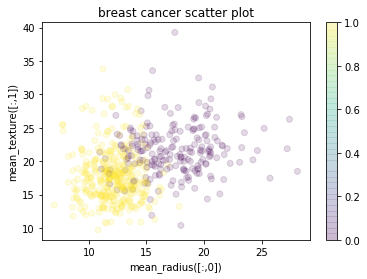

In [81]:
#col1= 15
#col2= 28

plt.scatter(cancer.data[:,0], cancer.data[:,1], c=cancer.target, alpha=0.15)
plt.title('breast cancer scatter plot')
plt.xlabel('mean_radius([:,0])')
plt.ylabel('mean_texture([:,1])')
plt.colorbar()
plt.show()
#얘는 그려지는데 왜 내꺼는 안 그려질까요

In [82]:
cancer.data[:,0]
#plt.xlabel('mean_radius([:,0])')

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.13 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 ,
       13.44 , 10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 13.17 ,
       12.05 , 13.49 , 11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 ,
       19.21 , 14.71 , 13.05 ,  8.618, 10.17 ,  8.598, 14.25 ,  9.173,
       12.68 , 14.78 ,  9.465, 11.31 ,  9.029, 12.78 , 18.94 ,  8.888,
       17.2  , 13.8  , 12.31 , 16.07 , 13.53 , 18.05 , 20.18 , 12.86 ,
       11.45 , 13.34 , 25.22 , 19.1  , 12.   , 18.46 , 14.48 , 19.02 ,
       12.36 , 14.64 , 14.62 , 15.37 , 13.27 , 13.45 , 15.06 , 20.26 ,
       12.18 ,  9.787, 11.6  , 14.42 , 13.61 ,  6.981, 12.18 ,  9.876,
       10.49 , 13.11 , 11.64 , 12.36 , 22.27 , 11.34 ,  9.777, 12.63 ,
      

In [83]:
cancer.data[:,1]
#plt.ylabel('mean_texture([:,1])')

array([10.38, 17.77, 21.25, 20.38, 14.34, 15.7 , 19.98, 20.83, 21.82,
       24.04, 23.24, 17.89, 24.8 , 23.95, 22.61, 27.54, 20.13, 20.68,
       22.15, 14.36, 15.71, 12.44, 14.26, 23.04, 21.38, 16.4 , 21.53,
       20.25, 25.27, 15.05, 25.11, 18.7 , 23.98, 26.47, 17.88, 21.59,
       21.72, 18.42, 25.2 , 20.82, 21.58, 21.35, 24.81, 20.28, 21.81,
       17.6 , 16.84, 18.66, 14.63, 22.3 , 21.6 , 16.34, 18.24, 18.7 ,
       22.02, 18.75, 18.57, 21.59, 19.31, 11.79, 14.88, 20.98, 22.15,
       13.86, 23.84, 23.94, 21.01, 19.04, 17.33, 16.49, 21.31, 14.64,
       24.52, 15.79, 16.52, 19.65, 10.94, 16.15, 23.97, 18.  , 20.97,
       15.86, 24.91, 26.29, 15.65, 18.52, 21.46, 24.59, 21.8 , 15.24,
       24.02, 22.76, 14.76, 18.3 , 19.83, 23.03, 17.84, 19.94, 12.84,
       19.77, 24.98, 13.43, 20.52, 19.4 , 19.29, 15.56, 18.33, 18.54,
       19.67, 21.26, 16.99, 20.76, 19.65, 20.19, 15.83, 21.53, 15.76,
       16.67, 22.91, 20.01, 10.82, 17.12, 20.2 , 10.89, 16.39, 17.21,
       24.69, 18.91,

In [86]:
#cancer.target.value_counts()

In [87]:
import sklearn.metrics as mt
import sklearn.svm as svm

In [88]:
from sklearn.model_selection import cross_val_score, cross_validate

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
svm_clf=svm.SVC(kernel='linear')

In [91]:
# 여기서부터 df로 새로 적용해보기
X = train_pre #~접종여부까지 날리고 백신 이후만 그냥 다 받음. opinion 제외한 train_pre 포함. 
y = df.iloc[:,1] #h1n1 vaccine 접종 여부
#나중에 train_pre로 df를 바꿔야 할 수도 있어 일단은 그냥 해보는거라.... 

In [92]:
X

,age_group,sex,education,income_poverty,employment_status,chronic_med_condition,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home
0,3,1,0,0,2,0,1,0,0,0,1
1,1,0,1,0,1,0,3,2,1,0,1
2,0,0,3,1,1,1,1,1,1,0,0
3,4,1,1,0,2,1,1,1,1,1,0
4,2,1,2,1,1,0,2,1,1,1,0
5,4,0,1,1,1,0,3,1,1,0,0
6,3,0,0,1,1,0,0,0,0,0,0
7,2,1,2,1,1,1,1,0,1,0,0
8,2,0,3,2,1,0,0,2,1,1,1
9,3,0,1,1,2,1,2,1,1,1,0


In [93]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
10       1
11       1
12       0
13       0
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       1
        ..
21513    0
21514    1
21515    0
21516    0
21517    0
21518    1
21519    0
21520    0
21521    0
21522    0
21523    1
21524    0
21525    1
21526    1
21527    0
21528    0
21529    0
21530    0
21531    0
21532    0
21533    0
21534    0
21535    0
21536    0
21537    0
21538    0
21539    0
21540    0
21541    0
21542    0
Name: h1n1_vaccine, Length: 21543, dtype: int64

In [94]:
scores=cross_val_score(svm_clf, X, y, cv= 5)
scores

array([0.78208401, 0.78185194, 0.78185194, 0.78203343, 0.78203343])

##### 또한, SVM은 스케일링에 민감하기 때문에 scaling을 진행하고 확인하겠습니다. scaling에 대한 내용은 추후에 포스팅 하겠습니다. 현재 사용한 scaling 기법은 StandardScaling으로써 평균을 0, 표준표차가 1이 되도록 하는 기법입니다. 
##### df로 계산한 array : array([0.78208401, 0.78185194, 0.78185194, 0.78203343, 0.78203343])

In [95]:
pd.DataFrame(cross_val_score(svm_clf, X, y, cv=5))

,0
0,0.782084
1,0.781852
2,0.781852
3,0.782033
4,0.782033


In [96]:
print('교차 평균: ', scores.mean())

교차 평균:  0.7819709476376128


In [97]:
scaler= StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)

In [98]:
# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                      test_size = 0.2, random_state = 33)


In [99]:
# SVM, kernel = 'linear'로 선형분리 진행
svm_clf=svm.SVC(kernel='linear', random_state=33)

In [100]:
scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
scores

array([0.78208401, 0.78185194, 0.78185194, 0.78203343, 0.78203343])

In [ ]:
pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))
# cv는 . 파라미터. 추후 파라미터 튜닝의 대상

In [ ]:
print('선형의 교차검증 평균: ', scores.mean())

### 비선형 분리 진행('rbf')

In [ ]:
# SVM, kernel = 'rbf'로 선형분리 진행
svm_clf1=svm.SVC(kernel='rbf')

In [ ]:
scores = cross_val_score(svm_clf1, X, y, cv = 5)
scores

In [ ]:
pd.DataFrame(cross_validate(svm_clf1, X, y, cv =5))

In [ ]:
print('비선형의 교차검증 평균: ', scores.mean())

##### 선형과 비선형의 결과가 같은데 비선형이 훨씬 더 시간이 걸리는 상태.

In [ ]:
sv=svm_clf 
#변수통일 위해서

### 산점도로 SVM 시각화 시도

In [ ]:
plt.scatter(df['opinion_h1n1_vacc_effective'], #1~5 효과있다 
            df['education'], # 0~3
            c=df['h1n1_vaccine'], 
            alpha=0.50, 
            s=df['income_poverty']*100)

plt.title('h1n1_vacc_ scatter plot')
plt.xlabel('opinion_h1n1_vacc_effective')
plt.ylabel('education')
plt.colorbar(label='h1n1_vaccine')
plt.show()
# 데이터 높아보이고 그나마 척도 많은 애로 나눠보느라...ㅜ ㅜ
#중간값이 없어 척도가 다... ㅋㅋㅋㅋㅋ 이게 뭐야 ㅋㅋㅋㅋㅋ
# x 백신이 효과적이라 보는 거 y는 교육수준 색 노랑 = 접종받은 거

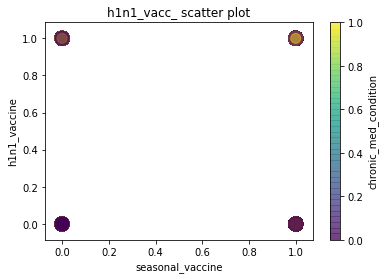

In [18]:
plt.scatter(df['seasonal_vaccine'], 
            df['h1n1_vaccine'], 
            c=df['chronic_med_condition'], 
            alpha=0.50, 
            s=df['income_poverty']*100)

plt.title('h1n1_vacc_ scatter plot')
plt.xlabel('seasonal_vaccine')
plt.ylabel('h1n1_vaccine')
plt.colorbar(label='chronic_med_condition')
plt.show()
#이게 뭐야ㅜㅜ

In [19]:
#sv추가어떻게 하지??ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
plt.scatter(X_train['opinion_h1n1_vacc_effective'], #1~5 효과있다 
            X_train['education'], # 0~3
            c=y_train['h1n1_vaccine'], 
            alpha=0.50, 
            s=df['income_poverty']*100)

plt.title('h1n1_vacc_ scatter plot')
plt.xlabel('opinion_h1n1_vacc_effective')
plt.ylabel('education')
plt.colorbar(label='h1n1_vaccine')
plt.show()
# 데이터 높아보이고 그나마 척도 많은 애로 나눠보느라...ㅜ ㅜ
#중간값이 없어 척도가 다... ㅋㅋㅋㅋㅋ 이게 뭐야 ㅋㅋㅋㅋㅋ
# x 백신이 효과적이라 보는 거 y는 교육수준 색 노랑 = 접종받은 거

KeyError: 'opinion_h1n1_vacc_effective'

In [20]:
from sklearn.decomposition import PCA

In [8]:
from sklearn.preprocessing import StandardScaler
vacc_scaled = StandardScaler().fit_transform(df)
        

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(vacc_scaled)
vacc_pca = pca.transform(vacc_scaled)
print(vacc_pca.shape)

(21543, 2)


In [10]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
vaccDF_pca = pd.DataFrame(vacc_pca,columns=pca_columns)
vaccDF_pca['target']=df['h1n1_vaccine']
vaccDF_pca.head(30)

,pca_component_1,pca_component_2,target
0,-2.175832,3.726843,0
1,1.931672,1.090044,0
2,-2.427033,0.033250,0
3,1.921150,1.650789,0
4,-0.676530,1.666356,0
5,0.575618,0.221488,0
6,-2.872301,1.037179,0
7,0.006757,-0.883753,1
8,-1.664263,-0.519155,0
9,0.029681,1.518322,0


In [11]:
target_name=np.array(['h1n1_vacc_no', 'h1n1_vacc_yes'])

In [12]:
target=df['h1n1_vaccine']

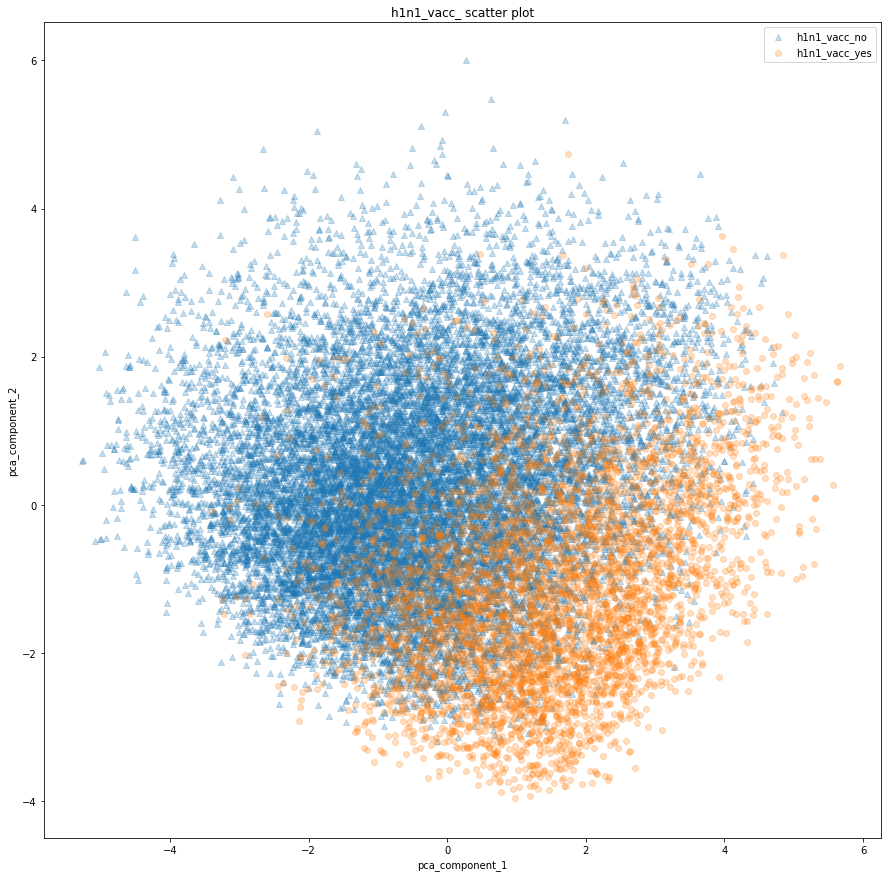

In [13]:
#비접종(0)을 세모, 접종(1)을 동그라미로 표시
plt.figure(figsize=(15,15))
markers=['^', 'o']
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = vaccDF_pca[vaccDF_pca['target']==i]['pca_component_1']
    y_axis_data = vaccDF_pca[vaccDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, 
                y_axis_data, 
                marker=marker,
                label=df['h1n1_vaccine'],
                alpha=0.25)
    
plt.legend(['h1n1_vacc_no', 'h1n1_vacc_yes'])
plt.title('h1n1_vacc_ scatter plot')
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [14]:
X=x_axis_data
y=y_axis_data

In [15]:
pca.explained_variance_

array([3.37390277, 2.22753412])

In [16]:
ratio=pca.explained_variance_ratio_

In [17]:
ratio

array([0.16868731, 0.11137154])